<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wine

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
*    1 - fixed acidity
*    2 - volatile acidity
*    3 - citric acid
*    4 - residual sugar
*    5 - chlorides
*    6 - free sulfur dioxide
*    7 - total sulfur dioxide
*    8 - density
*    9 - pH
*    10 - sulphates
*    11 - alcohol
*    Output variable (based on sensory data):
*    12 - quality (score between 0 and 10)

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [154]:
data_red = pd.read_csv('/content/winequality-red.csv',sep=';')

In [155]:
data_white = pd.read_csv('/content/winequality-white.csv', sep=';')

In [156]:
data_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

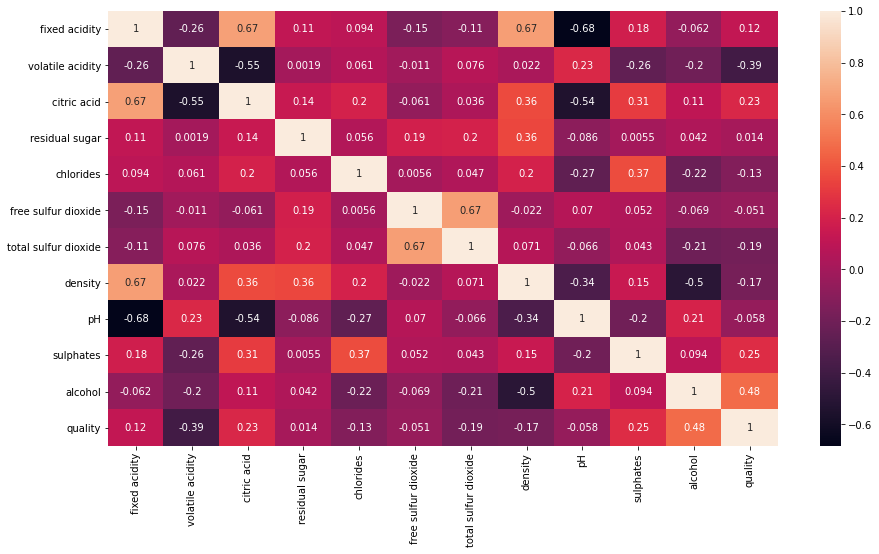

In [157]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data_red.corr(), annot=True);

In [158]:
X = data_red.drop('quality', axis=1)
y= data_red.quality

In [159]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importance = model.feature_importances_


<BarContainer object of 11 artists>

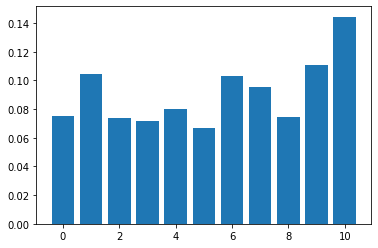

In [ ]:
plt.bar([x for x in range(len(importance))], importance)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score = model.score(X_test, y_test)
print (f'O Score do modelo foi de {score:.2f}')

O Score do modelo foi de 0.71


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7145833333333333

In [161]:
cross = cross_validate(model, X, y, cv=5)
cross_score = cross['test_score'].mean()

In [163]:
print (f'Com Corss Validation o score foi de {cross_score:.2f}')

Com Corss Validation o score foi de 0.58
